In [2]:
import pandas as pd
import numpy as np
import wooldridge
import matplotlib.pyplot as plt
import random
import statsmodels.api as sts
import scipy 


### Q2

#### (a)

In [3]:
#import data
wagedata = wooldridge.data("wage2")

In [32]:
wagedata.columns
display(wagedata.isnull().any())
display(wagedata.info())
display(wagedata.describe())
wagedata[:30]

wage       False
hours      False
IQ         False
KWW        False
educ       False
exper      False
tenure     False
age        False
married    False
black      False
south      False
urban      False
sibs       False
brthord     True
meduc       True
feduc       True
lwage      False
cooks      False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    int64  
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   KWW      935 non-null    int64  
 4   educ     935 non-null    int64  
 5   exper    935 non-null    int64  
 6   tenure   935 non-null    int64  
 7   age      935 non-null    int64  
 8   married  935 non-null    int64  
 9   black    935 non-null    int64  
 10  south    935 non-null    int64  
 11  urban    935 non-null    int64  
 12  sibs     935 non-null    int64  
 13  brthord  852 non-null    float64
 14  meduc    857 non-null    float64
 15  feduc    741 non-null    float64
 16  lwage    935 non-null    float64
 17  cooks    935 non-null    float64
dtypes: float64(5), int64(13)
memory usage: 131.6 KB


None

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage,cooks
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,852.000000,857.000000,741.000000,935.000000,9.350000e+02
mean,957.945455,43.929412,101.282353,35.744385,13.468449,11.563636,7.234225,33.080214,0.893048,0.128342,0.341176,0.717647,2.941176,2.276995,10.682614,10.217274,6.779004,9.495913e-04
std,404.360822,7.224256,15.052636,7.638788,2.196654,4.374586,5.075206,3.107803,0.309217,0.334650,0.474358,0.450385,2.306254,1.595613,2.849756,3.300700,0.421144,1.394305e-03
min,115.000000,20.000000,50.000000,12.000000,9.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.744932,1.173182e-09
25%,669.000000,40.000000,92.000000,31.000000,12.000000,8.000000,3.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,6.505783,9.488748e-05
50%,905.000000,40.000000,102.000000,37.000000,12.000000,11.000000,7.000000,33.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,12.000000,10.000000,6.807935,4.364540e-04
75%,1160.000000,48.000000,112.000000,41.000000,16.000000,15.000000,11.000000,36.000000,1.000000,0.000000,1.000000,1.000000,4.000000,3.000000,12.000000,12.000000,7.056175,1.251429e-03
max,3078.000000,80.000000,145.000000,56.000000,18.000000,23.000000,22.000000,38.000000,1.000000,1.000000,1.000000,1.000000,14.000000,10.000000,18.000000,18.000000,8.032035,1.277391e-02


,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage,cooks
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091,0.000281
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562,0.002003
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384,0.000187
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973,0.000031
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502,0.001332
5,1400,40,116,43,16,14,2,35,1,1,0,1,1,2.0,8.0,NaN,7.244227,0.000212
6,600,40,91,24,10,13,0,30,0,0,0,1,1,2.0,8.0,8.0,6.396930,0.000165
7,1081,40,114,50,18,8,14,38,1,0,0,1,2,3.0,8.0,NaN,6.985642,0.000368
8,1154,45,111,37,15,13,1,36,1,0,0,0,2,3.0,14.0,5.0,7.050990,0.000079
9,1000,40,95,44,12,16,16,36,1,0,0,1,1,1.0,12.0,11.0,6.907755,0.000453


In [34]:
wagedata = wagedata.fillna(method='ffill')

In [5]:
print("IQ average: {}".format(wagedata['IQ'].mean()))
print("IQ standard deviation: {}".format(wagedata['IQ'].std()))


IQ average: 101.28235294117647
IQ standard deviation: 15.052636370265098


#### (b)

In [35]:
model = sts.OLS(wagedata['wage'],wagedata['IQ'])
display(result = model.fit())
#wage increased 141.50 when adding 15 points to IQ
display(result.params[0]*15,result.summary())
#IQ explains a lot of the variaton of wages
display(result.rsquared)
#R square is 0.863

141.49846449518085

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   wage   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              5887.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):                        0.00
Time:                        10:22:34   Log-Likelihood:                         -6892.4
No. Observations:                 935   AIC:                                  1.379e+04
Df Residuals:                     934   BIC:                                  1.379e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
IQ             9.4332      0.123     76.726      0.000       9.192       9.675
==============================================================================
Omnibus:                      200.784   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.572
Skew:                           1.122   Prob(JB):                    1.65e-110
Kurtosis:                       5.818   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.8630663396231807

#### (c)

In [7]:
model2 = sts.OLS(np.log(wagedata['wage']),wagedata['IQ'])
result2 = model2.fit()
result2.params[0]*15
#wage increased 98.52% when adding 15 points to IQ
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   wage   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          4.653e+04
Date:                Sat, 04 Nov 2023   Prob (F-statistic):                        0.00
Time:                        10:03:41   Log-Likelihood:                         -1281.5
No. Observations:                 935   AIC:                                      2565.
Df Residuals:                     934   BIC:                                      2570.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
IQ             0.0657      0.000    215.708      0.000       0.065       0.066
==============================================================================
Omnibus:                        9.585   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.575
Skew:                           0.231   Prob(JB):                      0.00833
Kurtosis:                       3.181   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (d)

In [8]:
#the intercept in these models have no meaningful interpretation 
#since the IQ cannot be zero in reality yet the intercept shows 
#the predicted y when x equals to zero.
#the situations are similar in both percent change and value change

### Q3

#### （a)

<Figure size 640x480 with 0 Axes>

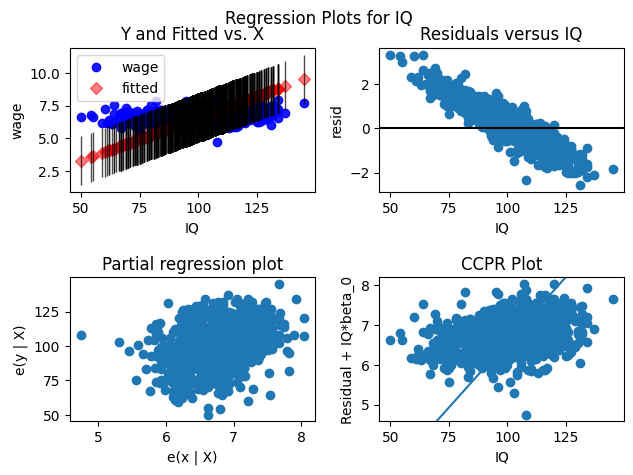

In [9]:
fig = plt.figure()
fig = sts.graphics.plot_regress_exog(result2,"IQ",)


Text(0, 0.5, 'residuals')

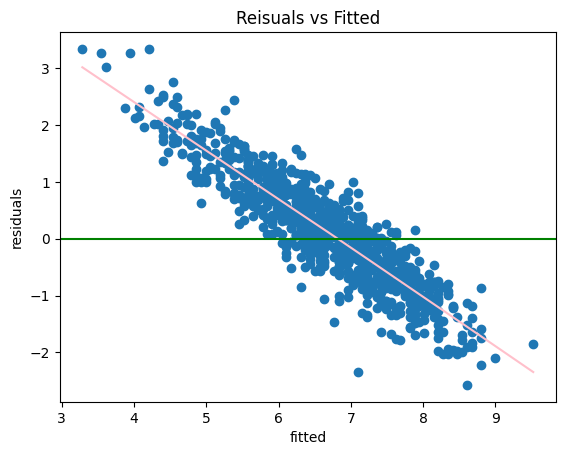

In [43]:
y = result2.resid
x = result2.fittedvalues
smoothed = sts.nonparametric.lowess(exog=x, endog=y, frac=0.99)

plt.scatter(x,y)
plt.plot(smoothed[:,0],smoothed[:,1],color="pink")
plt.axhline(y=0,color="green")
plt.title("Reisuals vs Fitted")
plt.xlabel("fitted")
plt.ylabel("residuals")

#### (b)

Text(0.5, 1.0, "Cook's distance plot")

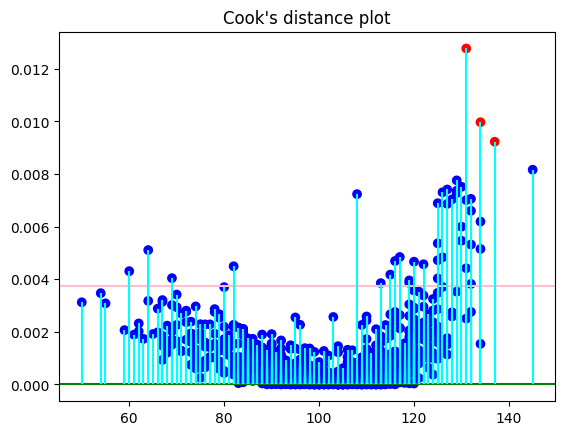

In [11]:
influence = result2.get_influence()
cooks = influence.cooks_distance
thre = cooks[0].mean() + cooks[0].std()*2
color = np.where(cooks[0] < 0.0085,"blue","red")
plt.scatter(x,cooks[0],color= color)
plt.axhline(y = thre,color="pink")
plt.axhline(y=0,color= "green")
plt.vlines(x=x.values,ymin=0,ymax=cooks[0],color="cyan")
plt.title("Cook's distance plot")

#some unusual observations exists as shown in the graph

#### (c)

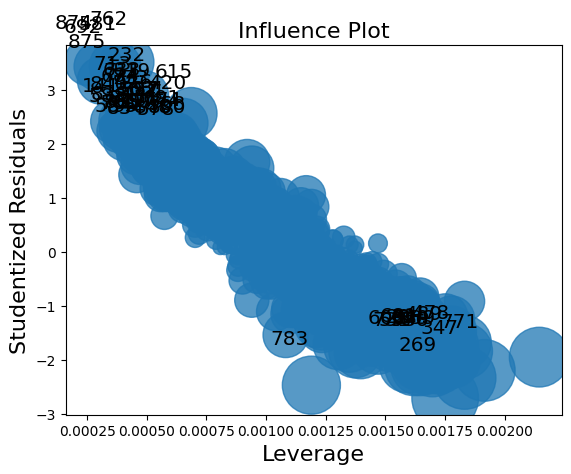

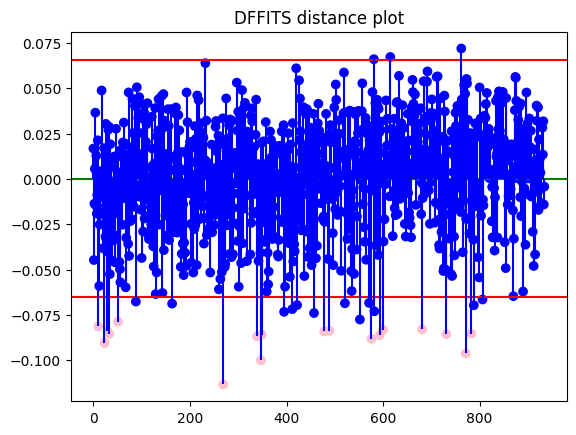

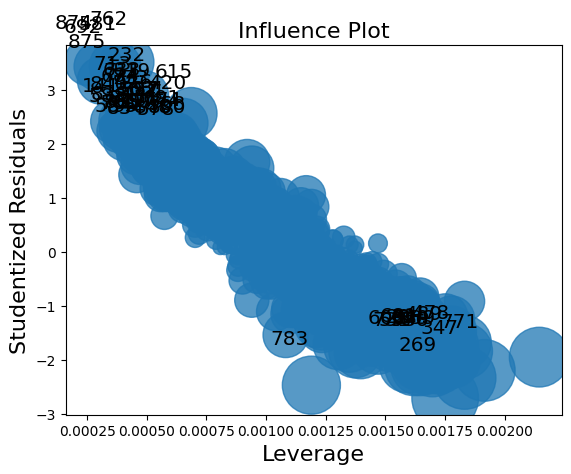

In [49]:
influence = result2.get_influence()
diffts, thre = influence.dffits
color = np.where(diffts<-thre*1.2,"pink","blue")
#color = np.where(cooks[0] < 0.0085,"blue","red")

x = wagedata.index

plt.scatter(x,diffts,color= color)
plt.axhline(y = thre,color='r')
plt.axhline(y = -thre,color="r")
plt.axhline(y=0,color= "green")
plt.vlines(x,ymin=0,ymax=diffts,color="b")
plt.title("DFFITS distance plot")

sts.graphics.influence_plot(result2,criterion="DFFITS")

#some unusual observations exists as shown in the graph
#as shown in the color of pink in the graph

#### (d) (e)

In [13]:
wagedata['cooks'] = cooks[0]
delete_thre =  cooks[0].mean() + cooks[0].std()*2
wagedata_del = wagedata.drop(wagedata[abs(wagedata['cooks'])>delete_thre].index)
display(sts.OLS(wagedata["wage"],wagedata['IQ']).fit().summary())
display(sts.OLS(wagedata_del["wage"],wagedata_del['IQ']).fit().summary())

#the R square increases after deleting unusual observations indicating
#that the model better fit the dataset and improves its performance

#the coefficient of IQ remains significant and the parameters ampliefied
#after deleting unusual observations, showing a greater effect on wage


#some other variables that may influence the wage and especially of those
#observations with higher payment such as family background are excluded 
#when removing the outliers from the sampling data.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   wage   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              5887.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):                        0.00
Time:                        10:03:42   Log-Likelihood:                         -6892.4
No. Observations:                 935   AIC:                                  1.379e+04
Df Residuals:                     934   BIC:                                  1.379e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
IQ             9.4332      0.123     76.726      0.000       9.192       9.675
==============================================================================
Omnibus:                      200.784   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.572
Skew:                           1.122   Prob(JB):                    1.65e-110
Kurtosis:                       5.818   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   wage   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              6264.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):                        0.00
Time:                        10:03:42   Log-Likelihood:                         -6558.3
No. Observations:                 895   AIC:                                  1.312e+04
Df Residuals:                     894   BIC:                                  1.312e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
IQ             9.6129      0.121     79.143      0.000       9.375       9.851
==============================================================================
Omnibus:                      206.504   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              546.132
Skew:                           1.181   Prob(JB):                    2.56e-119
Kurtosis:                       6.012   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

log(wage) = β0 + β1educ + β2exper + β3tenure + β4female + β5married + β6numdep

### Q4

#### (a)

In [3]:
wagedata1 = wooldridge.data("wage1")
model3 = sts.OLS(np.log(wagedata1['wage']),wagedata1[['educ', 'exper', 'tenure','female', 'married',
       'numdep']]).fit()
display(wagedata1.isnull().any())
display(wagedata1.describe())

wagedata1.fillna(method="bfill")


scipy.stats.normaltest(model3.resid)
#the residual is normally distributed with a sigfinicant level of 99%


wage        False
educ        False
exper       False
tenure      False
nonwhite    False
female      False
married     False
numdep      False
smsa        False
northcen    False
south       False
west        False
construc    False
ndurman     False
trcommpu    False
trade       False
services    False
profserv    False
profocc     False
clerocc     False
servocc     False
lwage       False
expersq     False
tenursq     False
dtype: bool

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


NormaltestResult(statistic=10.936345391614227, pvalue=0.004218934395198555)

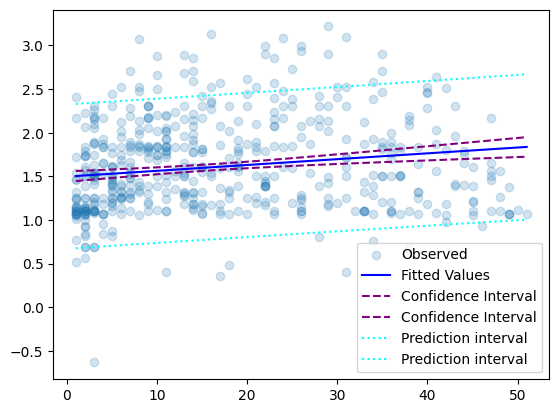

In [80]:
result4 = sts.OLS(np.log(wagedata1['wage']),wagedata1[['exper','educ','tenure','female','married','numdep']]).fit()
test_exper = np.linspace(wagedata1['exper'].min(),wagedata1['exper'].max(),100)
test_x = pd.DataFrame({'exper': test_exper})
for var in ['educ','tenure','female','married','numdep']:
    test_x[var] = wagedata1[var].mean()
predicted_result = result4.get_prediction(test_x).summary_frame(alpha=0.05)

plt.scatter(wagedata1['exper'],np.log(wagedata1['wage']),alpha=0.2)
plt.plot(test_exper,predicted_result['mean'],color = 'blue')
# confidence interval
plt.plot(test_exper,predicted_result['mean_ci_lower'],'--',color="purple") 
plt.plot(test_exper,predicted_result['mean_ci_upper'],'--',color= 'purple')
# prediction interval
plt.plot(test_exper,predicted_result['obs_ci_lower'],':',color='cyan')
plt.plot(test_exper,predicted_result['obs_ci_upper'],':',color='cyan') 
plt.legend(['Observed','Fitted Values','Confidence Interval','Confidence Interval','Prediction interval','Prediction interval'])

fitted values, observed values, prediction interval, and confidence
interval

#### (c)

In [116]:
import scipy.stats 

train_data = wagedata1[['wage','exper','educ','tenure','female','married','numdep']].copy()
train_data['wage'] = np.log(train_data['wage'])
cof_data = pd.DataFrame(index=['exper','educ','tenure','female','married','numdep'])

def bootstrap_regression(data,y_col,x_col,n):
    for i in range(n):
        boot = data.sample(len(data),replace=True)
        boot_fit = sts.OLS(boot[y_col],boot[x_col]).fit()
        cof_data[y_col + "_"+str(i)] = boot_fit.params
    return cof_data

boot_wage = bootstrap_regression(train_data,'wage',['exper','educ','tenure','female','married','numdep'],100)

boot_wage.std(axis=1)
#the standard error of bootstrap shown as below
# exper      0.001628
# educ       0.003018
# tenure     0.003727
# female     0.040098
# married    0.036757
# numdep     0.013642

#confidence interval
n = 0.05
"experienc beta confidence interval",boot_wage.T['exper'].quantile([n/2,1-n/2])

# ('experienc beta confidence interval',
#  0.025    0.003863
#  0.975    0.009987
#according to the confidence interval result, the conclusion that experience has a positive effect on wage is valid
#basic confidence interval
critical_value = scipy.stats.t.ppf(1-n/2,len(boot_wage)-1)
exper_std = boot_wage.std(axis=1).loc['exper']
basic_cofin_lower,basic_cofin_upper =result4.params['exper'] +critical_value * exper_std, result4.params['exper'] -critical_value * exper_std
#critical_value*exper_std
basic_cofin_lower,basic_cofin_upper
#(0.010461357879623738, 0.002900130973426724)
#according to the basic confidence interval result, the conclusion that experience has a positive effect on wage is valid


(0.010004696726179785, 0.003356792126870676)

(1 Points) Try at least 5 different possible sub-models using Mallow’s CP. Which yielded the best
result according to Mallow’s CP?
(e) (1 Points) Using 5-fold cross validation, compare the RMSE of the model in (a) to the one you
chose in (d). Which performs the best

(d)

In [5]:
def calculate_mallow_cp(model,X, y):
    """
    Calculates the Mallow's Cp of a multivariate linear regression model.
    
    Parameters:
    model (statsmodels.regression.linear_model.RegressionResultsWrapper): The fitted linear regression model.
    X (pandas.DataFrame): The independent variables used in the model.
    y (pandas.Series): The dependent variable used in the model.
    
    Returns:
    float: The Mallow's Cp value.
    """
    # Get the number of observations and independent variables
    n = len(y)
    p = len(X.columns)
    
    # Get the residual sum of squares and estimate of variance
    rss = np.sum(model.resid ** 2)
    sigma_hat = rss / (n - p)
    
    # Get the total sum of squares
    tss = np.sum((y - y.mean()) ** 2)
    
    # Calculate the Mallow's Cp value
    cp = (rss + 2 * p * sigma_hat) / tss
    
    return cp





In [10]:
import random
all_var = [['exper','educ','tenure','female','married','numdep']][0]
marrow_cp_result = pd.DataFrame(columns=['Mallow Cp','Variables'])
for _ in range(5):
    sub_var = random.sample(all_var,random.randint(1,len(all_var)))
    model = sts.OLS(np.log(wagedata1['wage']),wagedata1[sub_var]).fit()
    marrow_cp = calculate_mallow_cp(model,wagedata1[sub_var],wagedata1['wage'])
    marrow_cp_result.loc[len(marrow_cp_result)] = [marrow_cp,sub_var]
    print(marrow_cp,sub_var,"\n")
marrow_cp_result.sort_values(by='Mallow Cp',ascending=True)


#the model of [tenure, numdep, female, married, educ, exper] has the lowest Mallow Cp value


0.013849306130013025 ['female', 'educ', 'married', 'exper'] 

0.07532493513956336 ['exper', 'female', 'tenure'] 

0.08597235980580781 ['exper', 'tenure'] 

0.01313091342931071 ['tenure', 'numdep', 'female', 'married', 'educ', 'exper'] 

0.013979370669623124 ['tenure', 'numdep', 'educ', 'female'] 



,Mallow Cp,Variables
3,0.013131,"[tenure, numdep, female, married, educ, exper]"
0,0.013849,"[female, educ, married, exper]"
4,0.013979,"[tenure, numdep, educ, female]"
1,0.075325,"[exper, female, tenure]"
2,0.085972,"[exper, tenure]"


(e)

In [20]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

def cross_val_rmse(X, y):
    """
    Performs 5-fold cross validation of a linear regression model and returns the RMSE.
    
    Parameters:
    X (pandas.DataFrame): The independent variables used in the model.
    y (pandas.Series): The dependent variable used in the model.
    
    Returns:
    float: The RMSE value.
    """
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = LinearRegression().fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_list.append(rmse)
        
    return np.mean(rmse_list),rmse_list

display("wtih numdep:",cross_val_rmse(wagedata1[['educ', 'exper', 'tenure', 'female', 'married', 'numdep']],np.log(wagedata1['wage'])))
display("withou numdep:",cross_val_rmse(wagedata1[['educ', 'exper', 'tenure', 'female', 'married', 'numdep'][:-1]],np.log(wagedata1['wage'])))

#From the RMSE scores provided, it appears that the new model has slightly lower RMSE values across all five folds compared to the original model. This suggests that the new model is performing slightly better in terms of predictive
#accuracy on this specific dataset.

'wtih numdep:'

(0.41432448480881484,
 [0.39894935960905226,
  0.4616867614486147,
  0.369675347033923,
  0.43387318856767876,
  0.40743776738480575])

'withou numdep:'

(0.41390618700756676,
 [0.39895359706183336,
  0.4612930720265679,
  0.3690410466083827,
  0.43334877319430615,
  0.40689444614674375])

['educ', 'exper', 'tenure', 'female', 'married']

Q5

(a)

d) (1 Points) Try at least 5 different possible sub-models using Mallow’s CP. Which yielded the best
result according to Mallow’s CP?
(e) (1 Points) Using 5-fold cross validation, compare the RMSE of the model in (a) to the one you
chose in (d). Which performs the best?
5. (3.5 points) Use the VOTE1 dataset from the Wooldridge python module to answer the following ques-
tion. Import this data into your notebook.
(a) (1 Points) Consider a model with an interaction between expenditures:
voteA = β0 + β1prtystrA + β2expendA + β3expendB + β4expendA ∗ expendB
What is the partial effect of expendB on voteA, holding prtystrA and expendA fixed? What is the
partial effect of expendA on voteA? Is the expected sign for b4 obvious?
(b) (1 Points) Estimate the equation in part (a) and report the results in the usual form. Is the
interaction term statistically significant?
(c) (.5 Points) Find the average of expendA in the sample. Fix expendA at 250 (for 250,000). What is
the estimated effect of another 100,000 spent by Candidate B on voteA? Is this a large effect?
(d) (.5 Points) Now fix expendB at 90. What is the estimated effect of ∆expendA = 100 on voteA?
Does this make sense?
(e) (.5 Points) Now, estimate a model that replaces the interaction with shareA, Candidate A’s percent-
age share of total campaign expenditures. Does it make sense to hold both expendA and expendB
fixed, while changing shareA?
Page 2


oteA = β0 + β1prtystrA + β2expendA + β3expendB + β4expendA ∗ expendB

In [22]:

votedata = wooldridge.data('vote1')
print(votedata.isnull().any())
print(votedata.info())
print(votedata.describe())
votedata.head(5)


state       False
district    False
democA      False
voteA       False
expendA     False
expendB     False
prtystrA    False
lexpendA    False
lexpendB    False
shareA      False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     173 non-null    object 
 1   district  173 non-null    int64  
 2   democA    173 non-null    int64  
 3   voteA     173 non-null    int64  
 4   expendA   173 non-null    float64
 5   expendB   173 non-null    float64
 6   prtystrA  173 non-null    int64  
 7   lexpendA  173 non-null    float64
 8   lexpendB  173 non-null    float64
 9   shareA    173 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 13.6+ KB
None
         district      democA       voteA      expendA      expendB  \
count  173.000000  173.000000  173.000000   173.000000   173.000000   
mean     8.838150    0.55

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
0,AL,7,1,68,328.295990,8.737000,41,5.793916,2.167567,97.407669
1,AK,1,0,62,626.377014,402.476990,60,6.439952,5.997638,60.881039
2,AZ,2,1,73,99.607002,3.065000,55,4.601233,1.120048,97.014763
3,AZ,3,0,69,319.690002,26.281000,64,5.767352,3.268846,92.403702
4,AR,3,0,75,159.220993,60.054001,66,5.070293,4.095244,72.612473


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      A   R-squared (uncentered):                   0.071
Model:                            OLS   Adj. R-squared (uncentered):              0.042
Method:                 Least Squares   F-statistic:                              2.459
Date:                Wed, 08 Nov 2023   Prob (F-statistic):                      0.0674
Time:                        16:29:38   Log-Likelihood:                         -142.26
No. Observations:                 100   AIC:                                      290.5
Df Residuals:                      97   BIC:                                      298.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
B             -0.2889      0.111     -2.595      0.011      -0.510      -0.068
C             -0.0945      0.104     -0.905      0.368      -0.302       0.113
D             -0.0465      0.101     -0.459      0.647      -0.247       0.154
==============================================================================
Omnibus:                        0.351   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.082
Skew:                           0.038   Prob(JB):                        0.960
Kurtosis:                       3.117   Cond. No.                         1.15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
votedata = wooldridge.data("vote1")
votedata['expendA*expendB'] = votedata['expendA']*votedata['expendB']
#votedata = pd.get_dummies(votedata,columns=['prtystrA','prtystrB'])
q5_result1 = sts.OLS(votedata["voteA"],votedata[["expendA","expendB","prtystrA","expendA*expendB"]]).fit()
display(q5_result1.summary())

beta_expendA = q5_result1.params['expendA']
beta_expendB = q5_result1.params['expendB']
beta_expendA_expendB = q5_result1.params['expendA*expendB']
fixed_prtystrA = votedata['prtystrA'].mean()
fixed_expendA = votedata['expendA'].mean()
fixed_expendB = votedata['expendB'].mean()
# Compute the partial effects
partial_effect_expendB = beta_expendB + beta_expendA_expendB * fixed_expendA
partial_effect_expendA = beta_expendA + beta_expendA_expendB * fixed_expendB
print(f'Partial effect of expendB on voteA, holding prtystrA and expendA fixed, is: {partial_effect_expendB}')
print(f'Partial effect of expendA on voteA, holding prtystrA and expendB fixed, is: {partial_effect_expendA}')
#the effect of b4 is not obivous it is negative yet the absolute value is small

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  voteA   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              728.2
Date:                Thu, 09 Nov 2023   Prob (F-statistic):                   2.29e-105
Time:                        23:37:51   Log-Likelihood:                         -681.86
No. Observations:                 173   AIC:                                      1372.
Df Residuals:                     169   BIC:                                      1384.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
expendA             0.0429      0.006      7.706      0.000       0.032       0.054
expendB            -0.0207      0.005     -4.246      0.000      -0.030      -0.011
prtystrA            0.9040      0.041     22.228      0.000       0.824       0.984
expendA*expendB -2.028e-05   7.84e-06     -2.588      0.011   -3.57e-05   -4.81e-06
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.406
Skew:                           0.001   Prob(JB):                        0.816
Kurtosis:                       3.237   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Partial effect of expendB on voteA, holding prtystrA and expendA fixed, is: -0.027029973008845343
Partial effect of expendA on voteA, holding prtystrA and expendB fixed, is: 0.036728712513510085


In [27]:
q5_result1.pvalues['expendA*expendB']
#the p value of the interaction term is 0.000 which is smaller than 0.05
#it is significant at 5% level

0.010505016440693701

In [29]:
mean_expendA = votedata['expendA'].mean()
effect1 = (beta_expendB + beta_expendA_expendB * 250) * 100
display(mean_expendA,effect1)
#average of expend is 310.61 and the effect of expendB is -2.58

310.6110049300111

-2.580095255167228

In [30]:
effect2 = (beta_expendA + beta_expendA_expendB * 90) * 100
display(effect2)
#the effect of expendA is 4.1090

4.109010219756867

It's not realistic to consider shareA as the percentage share of total campaign expenditures by Candidate A. ShareA is dependent on ExpendA and ExpendB, and any alteration in ShareA will impact ExpendA or ExpendB. Therefore, this model exhibits signs of multicollinearity.

In [32]:
votedata['shareA'] = votedata['expendA']/(votedata['expendA']+votedata['expendB'])
sts.OLS(votedata["voteA"],votedata[["expendA","expendB","prtystrA","expendA*expendB",'shareA']]).fit().summary()
#you can see in the result that the coefficient of interaction term is not significant
#due to the inclusion of shareA, as its high correlation with the interaction term cause multicollinearity

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  voteA   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              1963.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):                   5.52e-147
Time:                        23:47:17   Log-Likelihood:                         -579.66
No. Observations:                 173   AIC:                                      1169.
Df Residuals:                     168   BIC:                                      1185.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
expendA            -0.0095      0.004     -2.315      0.022      -0.018      -0.001
expendB             0.0128      0.003      3.985      0.000       0.006       0.019
prtystrA            0.4392      0.033     13.370      0.000       0.374       0.504
expendA*expendB -4.868e-06   4.42e-06     -1.100      0.273   -1.36e-05    3.87e-06
shareA             54.2798      2.786     19.482      0.000      48.780      59.780
==============================================================================
Omnibus:                       35.691   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.877
Skew:                           0.771   Prob(JB):                     3.08e-25
Kurtosis:                       6.644   Cond. No.                     1.55e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""